In [1]:
%pip install seaborn


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import mean_absolute_error , r2_score , mean_absolute_percentage_error
import statsmodels.api as sm
import seaborn as sns

In [3]:
path = 'salary_data.csv'
data = pd.read_csv(path)

In [4]:
data.shape

(30, 2)

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [9]:
features = ['YearsExperience']

X = data[features]
y = data['Salary']

In [10]:
X.shape

(30, 1)

In [11]:
y.shape

(30,)

Plotting 


/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x500 with 0 Axes>

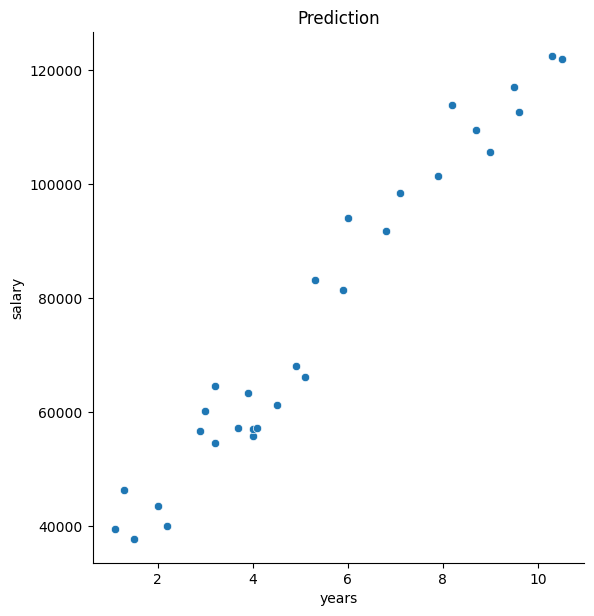

In [12]:
plt.figure(figsize=(10,5))
sns.pairplot(data,x_vars = ['YearsExperience'],y_vars = ['Salary'],kind = 'scatter',size = 6)
plt.xlabel('years')
plt.ylabel('salary')
plt.title('Prediction')
plt.show()

Train Test Split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 28)


In [14]:
X_train.describe()

,YearsExperience
count,24.000000
mean,5.425000
std,2.992491
min,1.100000
25%,3.150000
50%,5.000000
75%,8.100000
max,10.500000


In [15]:
X_test.describe()

,YearsExperience
count,6.000000
mean,4.866667
std,2.284440
min,2.200000
25%,3.750000
50%,4.000000
75%,6.350000
max,8.200000


In [16]:
y_train.describe()

count        24.000000
mean      77109.416667
std       27710.132532
min       37731.000000
25%       56430.000000
50%       66983.500000
75%      102372.000000
max      122391.000000
Name: Salary, dtype: float64

In [17]:
y_test.describe()

count         6.000000
mean      71577.333333
std       28240.027186
min       39891.000000
25%       57108.000000
50%       60203.500000
75%       89509.250000
max      113812.000000
Name: Salary, dtype: float64

Cross-Validating for linearRegression

In [39]:
param_grid = {'fit_intercept':[True,False] , 'copy_X' : [True,False] , 'n_jobs': [1,2,5,7] , 'positive' : [True,False]}
grd_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid)
grd_search.fit(X,y)
grd_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

Using Sklearn

In [42]:
model = LinearRegression(copy_X= True, fit_intercept = True, n_jobs = 1, positive = True)
model.fit(X_train,y_train)


LinearRegression(n_jobs=1, positive=True)

In [43]:
prediction = model.predict(X_test)
mae = mean_absolute_error(y_test,prediction)
mape = mean_absolute_percentage_error(y_test,prediction)
r2 = r2_score(y_test,prediction)


In [44]:
print(f"Mean Absolute error is : {mae}")
print(f"r squared score is : {r2}")
print(f"Mean Absolute percent  error is : {mape}")

Mean Absolute error is : 6270.435741509475
r squared score is : 0.9217841352107625
Mean Absolute percent  error is : 0.09578143969300508


Using Statsmodel

In [22]:
#adding constant
X_const = sm.add_constant(X_train)
modelSM = sm.OLS(y_train,X_const).fit()

In [23]:
modelSM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     569.0
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           3.26e-17
Time:                        04:39:26   Log-Likelihood:                -239.56
No. Observations:                  24   AIC:                             483.1
Df Residuals:                      22   BIC:                             485.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.782e+04   2348.483     11.845      0.000    2.29e+04    3.27e+04
YearsExperience  9085.8954    380.912     23.853      0.000    8295.933    9875.858
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.530
Skew:                           0.192   Prob(JB):                        0.767
Kurtosis:                       2.382   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print(modelSM.rsquared,modelSM.rsquared_adj)

0.9627728874740024 0.9610807459955479


Plotting for prediction

Text(1, 4, 'Blue represents the training set.\nRed represents testing set.\n')

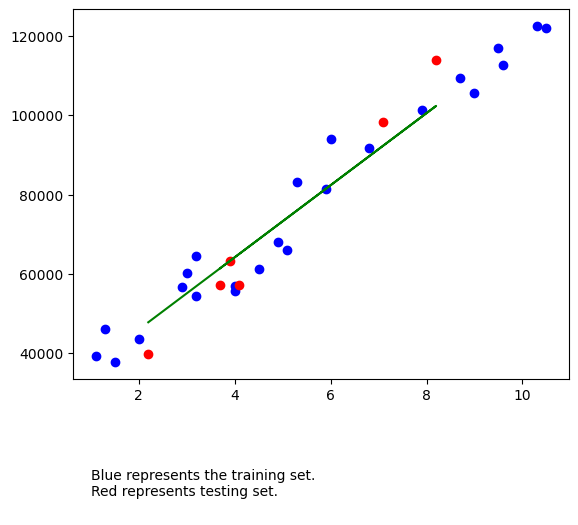

In [25]:
fig = plt.figure()
subplt = fig.add_subplot()
plt.scatter(X_train,y_train,color = 'b')
plt.scatter(X_test,y_test,color = 'r')

plt.plot(X_test,prediction,color = 'g')
subplt.text(1,4,'Blue represents the training set.\nRed represents testing set.\n')
